<a href="https://colab.research.google.com/github/Kishankumar1328/-DATA-ANALYSICS/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT LIBRARIES
import math
import datetime
import pandas as pd
import yfinance as yf
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

bold text

In [ ]:
ticker=yf.Ticker('AAPL')
df=yf.download("AAPL",start='2005-01-13',end='2023-05-30',interval='1d')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-13,1.316250,1.328929,1.245179,1.246429,1.057965,3164716800
2005-01-14,1.254464,1.280714,1.235536,1.253571,1.064026,1770742400
2005-01-18,1.247321,1.262500,1.209821,1.261607,1.070848,1006460000
2005-01-19,1.258750,1.276071,1.245536,1.247857,1.059177,751895200
2005-01-20,1.243750,1.272679,1.240536,1.258214,1.067968,914922400
...,...,...,...,...,...,...
2023-05-22,173.979996,174.710007,173.449997,174.199997,173.965073,43570900
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.328644,50747300
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.608261,45143500


In [ ]:
df.shape

(4624, 6)

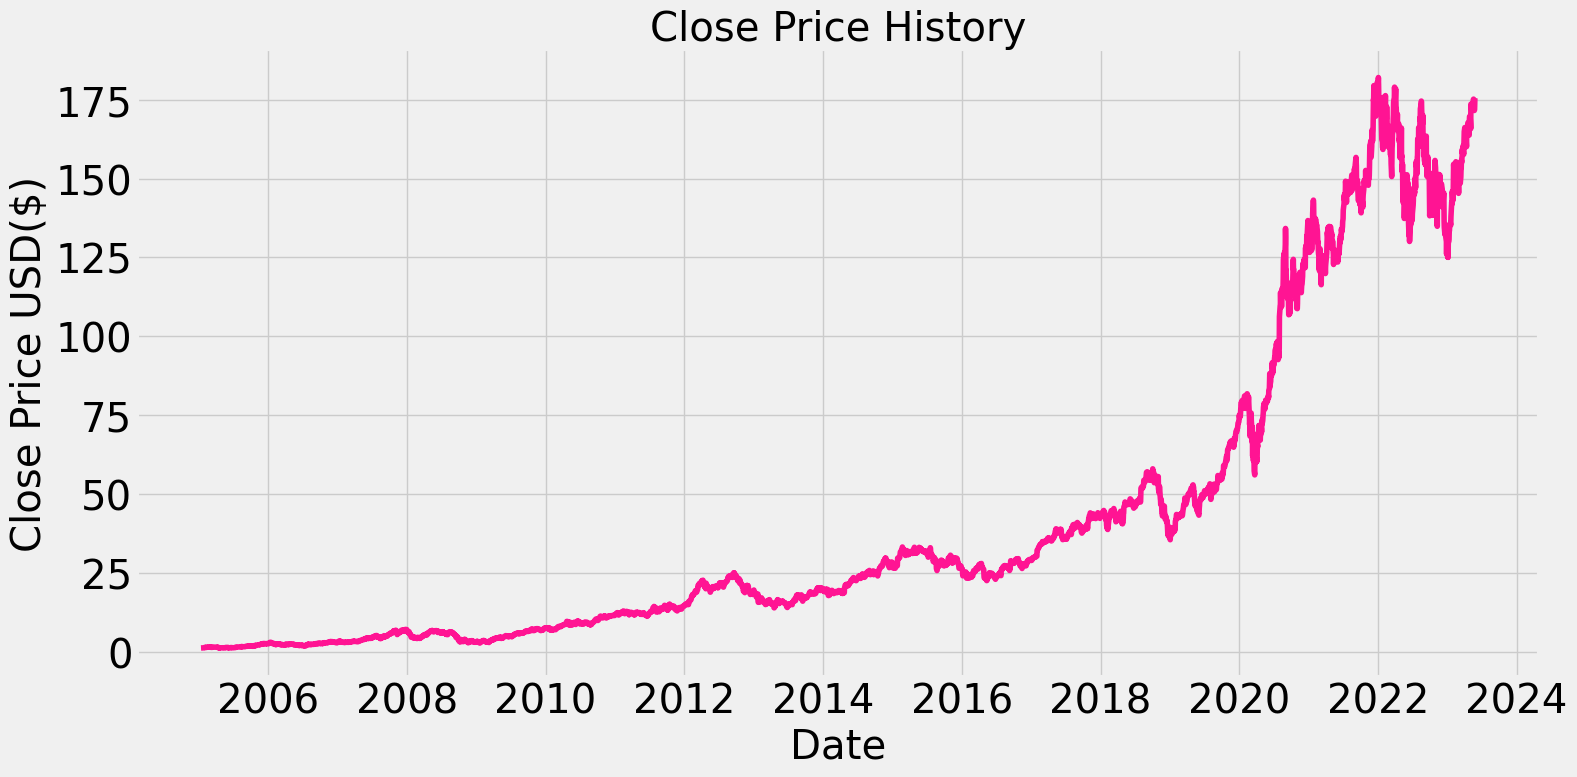

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History',fontsize=29)
plt.plot(df['Close'],alpha=1,color='deeppink',)
plt.xlabel('Date',fontsize=29)
plt.ylabel('Close Price USD($)',fontsize=29)
plt.xticks(fontsize=29)
plt.yticks(fontsize=29)
plt.tight_layout()
plt.show()

In [ ]:
#create a new dataframe for close price
data=df.filter(['Close'])
#convert dataframe into numpy array
dataset=data.values
#get number of rows and training the model
training_data_len=math.ceil(len(dataset)*.8)
training_data_len


3700

In [ ]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[1.52108812e-04],
       [1.91613347e-04],
       [2.36062542e-04],
       ...,
       [9.43747230e-01],
       [9.50108215e-01],
       [9.63604386e-01]])

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data=scaled_data[0:training_data_len]
#we have to train the model
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train )
    print()

[array([0.00015211, 0.00019161, 0.00023606, 0.00016001, 0.00021729,
       0.00022026, 0.00024693, 0.00037434, 0.0003941 , 0.00043262,
       0.00056497, 0.00085339, 0.00091561, 0.00112304, 0.00094327,
       0.00104501, 0.00105489, 0.00124848, 0.00103513, 0.0009976 ,
       0.0012791 , 0.0016169 , 0.00199026, 0.00216015, 0.001931  ,
       0.00183223, 0.00168209, 0.00197248, 0.00204162, 0.00204755,
       0.00211965, 0.00204854, 0.00197347, 0.00151319, 0.00171469,
       0.00170283, 0.00126428, 0.00103118, 0.001126  , 0.00121292,
       0.0012228 , 0.00134923, 0.00139268, 0.00160406, 0.00174432,
       0.0018905 , 0.00171864, 0.00166332, 0.00165344, 0.00165937,
       0.00150528, 0.00171271, 0.00148948, 0.0013354 , 0.00137491,
       0.00153294, 0.00161986, 0.00186284, 0.0018984 , 0.00153887])]
[0.001685049873928035]

[array([0.00015211, 0.00019161, 0.00023606, 0.00016001, 0.00021729,
       0.00022026, 0.00024693, 0.00037434, 0.0003941 , 0.00043262,
       0.00056497, 0.00085339, 0.0

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3640, 60, 1)

In [ ]:
#bulit the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)


3640/3640 [==============================] - 121s 32ms/step - loss: 1.0901e-04


In [ ]:
#create the testing datset
#create a new array containing scaled values from index
test_data=scaled_data[training_data_len-60:,:]
#create the dataset x_train and y_train
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
#convert the data to numpy array
x_test=np.array(x_test)


In [ ]:
#Reshape  the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


29/29 [==============================] - 1s 17ms/step


In [ ]:
#get root mean square error(RMSE)
rsme=np.sqrt(np.mean(predictions-y_test)**2)
rsme


4.993247449140012

<ipython-input-93-1757b731668a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


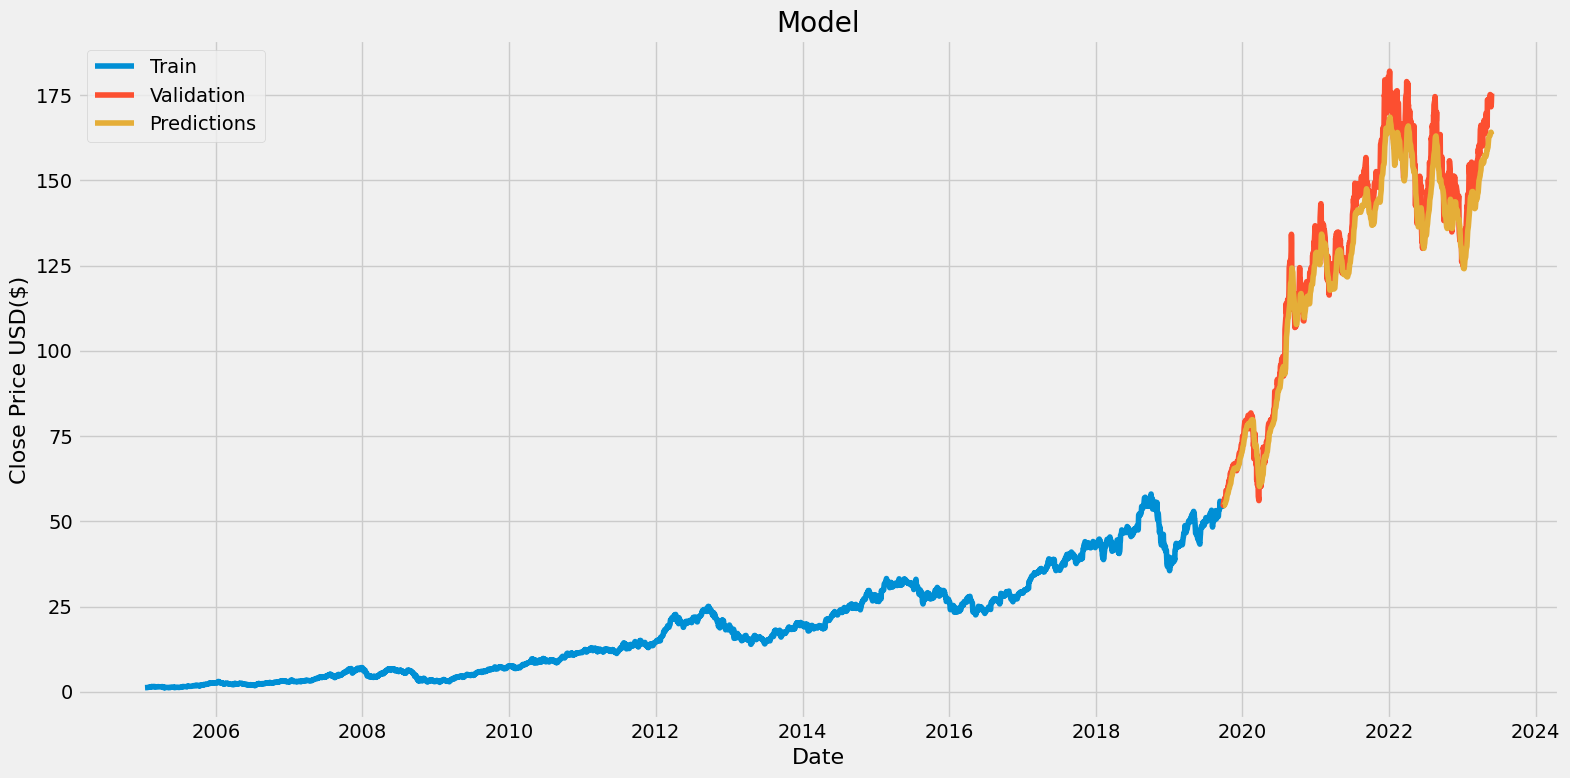

In [ ]:


train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD($)', fontsize=16)
plt.tight_layout()

# Plot the training data
plt.plot(train['Close'], label='Train')

# Plot the validation data (Close prices)
plt.plot(valid['Close'], label='Validation')

# Plot the predicted data
plt.plot(valid['Predictions'], label='Predictions')

plt.legend(loc='upper left')
plt.show()


In [ ]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2019-09-26,54.972500,54.555607
2019-09-27,54.705002,54.563393
2019-09-30,55.992500,54.544716
2019-10-01,56.147499,54.674911
2019-10-02,54.740002,54.877998
...,...,...
2023-05-22,174.199997,163.835098
2023-05-23,171.559998,164.107086
2023-05-24,171.839996,163.959793


In [ ]:
ticker=yf.Ticker('AAPL')
apple_quote=yf.download("AAPL",start='2014-01-13',end='2023-06-1',interval='1d')
new_df=apple_quote.filter(['Close'])
#get the last 60 days closing price value convert into datframe to an array
last_60_days=new_df[-60:].values
#scale the data to be values between 0 to 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
x_test=[]
#Append the last 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test=np.array(x_test)
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(x_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
pred_price
#predict the price for next day 2023-6-2

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 27ms/step


array([[165.0104]], dtype=float32)

In [ ]:
ticker=yf.Ticker('AAPL')
apple_quote2=yf.download("AAPL",start='2023-05-26',end='2023-05-31',interval='1d')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2023-05-26    175.429993
2023-05-30    177.300003
Name: Close, dtype: float64


In [ ]:
pip install keras

In [ ]:
pip install scikit-learn


In [ ]:
pip install pandas-datareader

In [ ]:
pip install tensorflow